In [14]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#set seaborn as default
sns.set()

In [34]:
#Read the file into a DataFrame: data
data = pd.read_csv('bankruptcy.csv')
data_bkp = pd.read_csv('bankruptcy.csv')

In [35]:
#Covert the class variable to binary integer values 
data['class'] = data['class'].replace(["b'0'","b'1'"],[0,1])
data.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class       int64
Length: 65, dtype: object

<b> Data Cleaning </b>

In [36]:
data.head(4)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [38]:
#Check for duplicate entries 
data = data.drop_duplicates()
data.info()
#10503 to 10416 entries 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10416 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10416 non-null  float64
 1   Attr2   10416 non-null  float64
 2   Attr3   10416 non-null  float64
 3   Attr4   10398 non-null  float64
 4   Attr5   10391 non-null  float64
 5   Attr6   10416 non-null  float64
 6   Attr7   10416 non-null  float64
 7   Attr8   10402 non-null  float64
 8   Attr9   10413 non-null  float64
 9   Attr10  10416 non-null  float64
 10  Attr11  10416 non-null  float64
 11  Attr12  10398 non-null  float64
 12  Attr13  10373 non-null  float64
 13  Attr14  10416 non-null  float64
 14  Attr15  10408 non-null  float64
 15  Attr16  10402 non-null  float64
 16  Attr17  10402 non-null  float64
 17  Attr18  10416 non-null  float64
 18  Attr19  10373 non-null  float64
 19  Attr20  10373 non-null  float64
 20  Attr21  9611 non-null   float64
 21  Attr22  10416 non-null  float64
 22

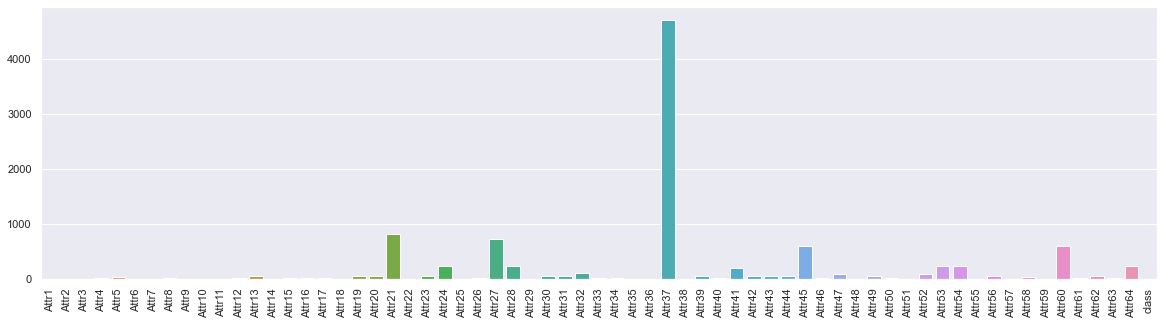

In [39]:
#Dealing with NULL values in the dataset 
plt.figure(figsize=(20,5)) 
sns.barplot(x=data.columns,y=data.isnull().sum())
plt.xticks(rotation='vertical')
plt.show()

Theoretically 25 to 30% is the maximum missing values that are allowed. Otherwise, the column is usually dropped from the analysis. 

In [40]:
x = ((data.isnull().sum()/10416)*100).round(2).to_frame().reset_index()
x.columns = x.columns.astype(str)
x.rename(columns={'index': 'Features', '0': 'Percentage of null values'}, inplace=True)
x.sort_values('Percentage of null values',ascending = False).head(10)

,Features,Percentage of null values
36,Attr37,45.15
20,Attr21,7.73
26,Attr27,6.85
44,Attr45,5.65
59,Attr60,5.65
23,Attr24,2.18
52,Attr53,2.16
27,Attr28,2.16
53,Attr54,2.16
63,Attr64,2.16


In [41]:
#Remove Attr 37 column since it has more than 30% NULL values 
data.drop(columns = ['Attr37'], inplace = True)

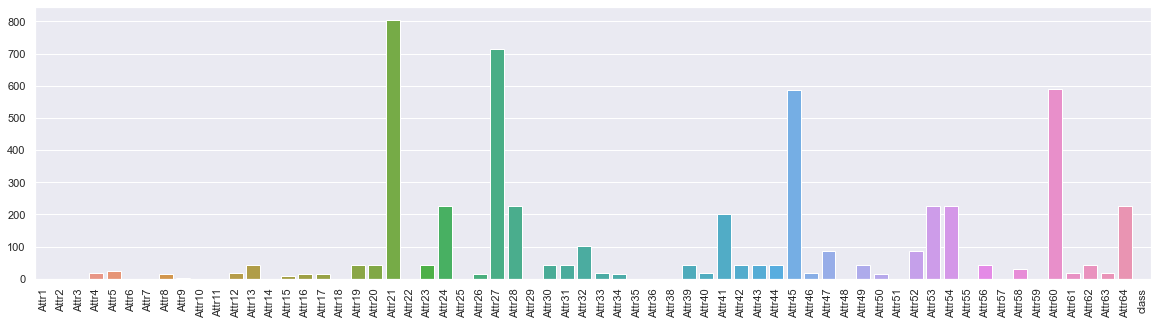

In [42]:
plt.figure(figsize=(20,5)) 
sns.barplot(x=data.columns,y=data.isnull().sum())
plt.xticks(rotation='vertical')
plt.show()

<b>Data Imputation</b>

Mean, Median, Mode and Multivariate imputation 

In [43]:
def mean_imputation (col,df):
    df[col].fillna(df[col].mean(), inplace=True)

def median_imputation (col,df):
    df[col].fillna(df[col].median(), inplace=True)
    
def mode_imputation (col,df):
    df[col].fillna(df[col].mode(), inplace=True)

In [25]:
"""
**********IGNORE*****************

data_mean = data 
data_med = data 
data_mod = data 
col = data_mean.columns 
for i in col:
    mean_imputation(i,data_mean)
    median_imputation(i,data_med) 
    mode_imputation(i,data_mod) 
"""

In [75]:
"""Data Imputation must be done seperately when categorical variables are present. Hence, splitting the data based on "CLASS" 
and then performing median imputation"""

data_med_0 = data[data['class']==0].copy(deep=True)
data_med_1 = data[data['class']==1].copy(deep=True)
for i in data_med.columns :
    median_imputation(i,data_med_0) 
    median_imputation(i,data_med_1)

data_imputed = pd.concat([data_med_0,data_med_1])
data_imputed['Attr1'].count()

10416

In [ ]:
##### On - Hold #####
#Multivariate Imputation 

imp = IterativeImputer(missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data_mi =imp.fit_transform(data)

data_multi = pd.DataFrame(data=data_mi)

<b> Outlier Detection </b>

1. Box Plot Method 

Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:

    1. Arrange your data in ascending order
    2. Calculate Q1 ( the first Quarter)
    3. Calculate Q3 ( the third Quartile)
    4. Find IQR = (Q3 - Q1)
    5. Find the lower Range = Q1 -(1.5 * IQR)
    6. Find the upper Range = Q3 + (1.5 * IQR)

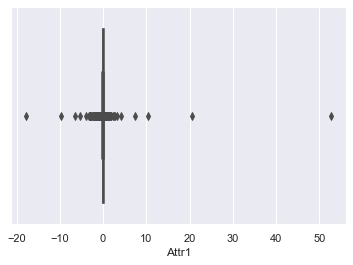

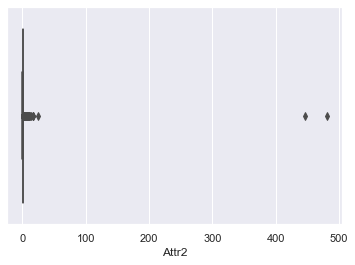

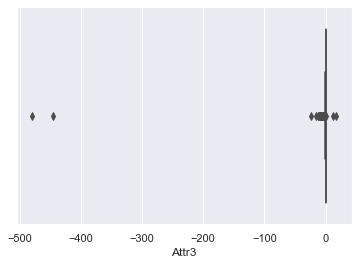

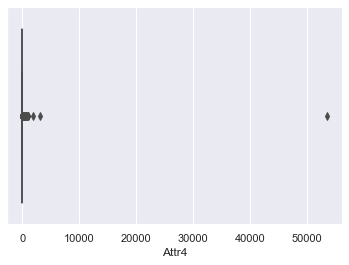

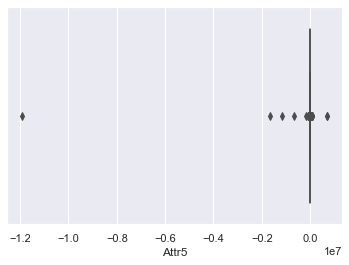

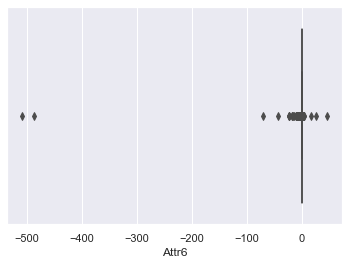

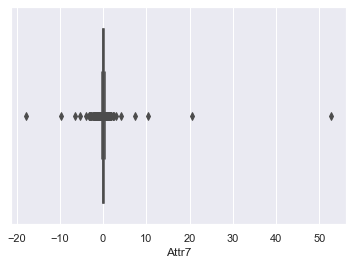

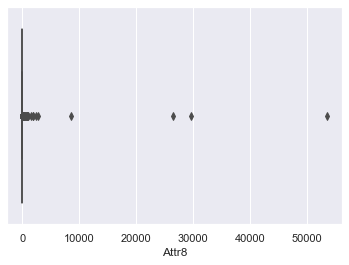

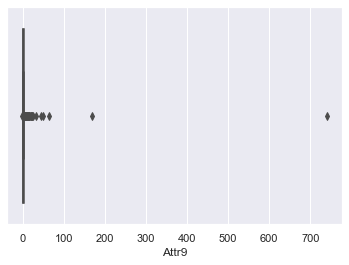

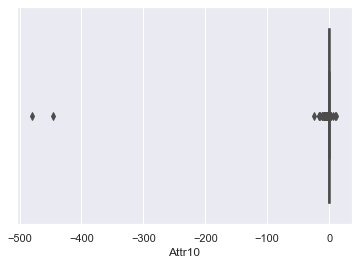

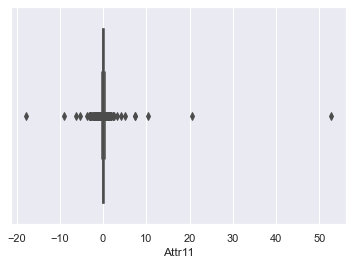

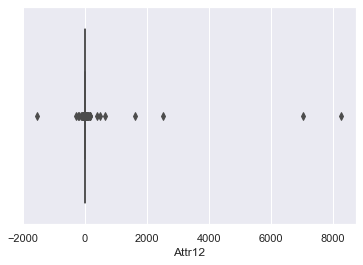

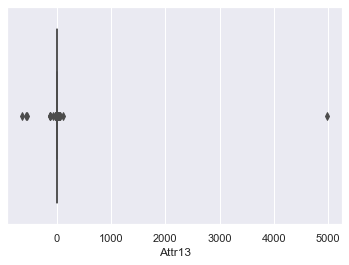

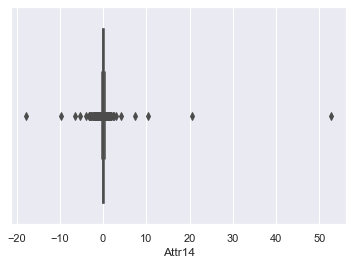

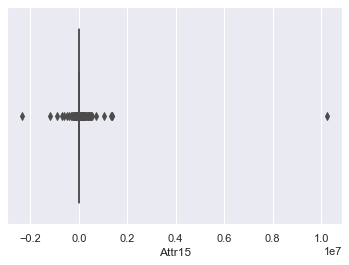

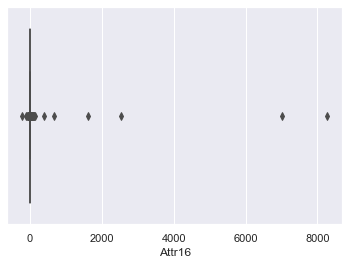

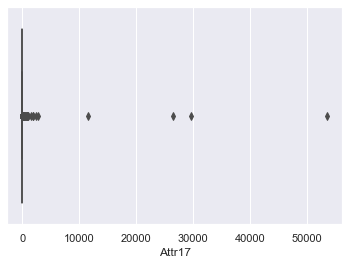

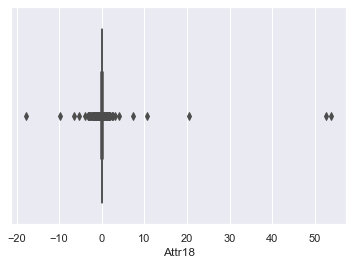

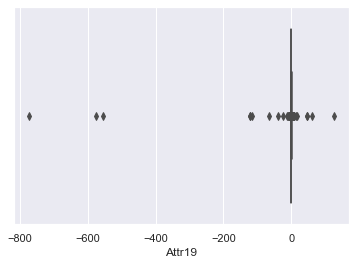

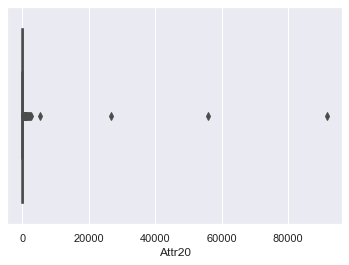

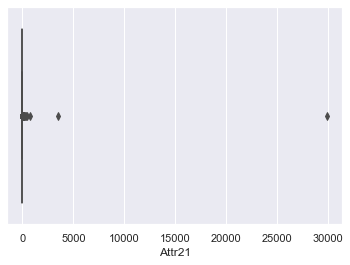

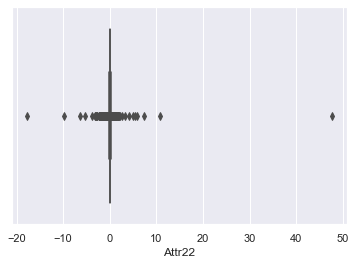

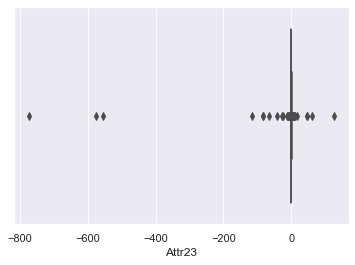

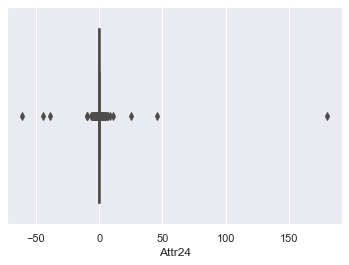

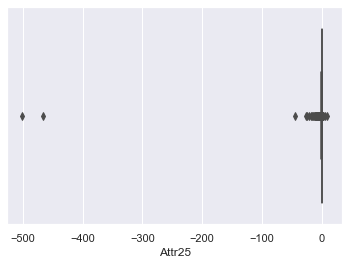

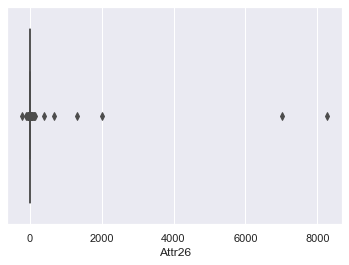

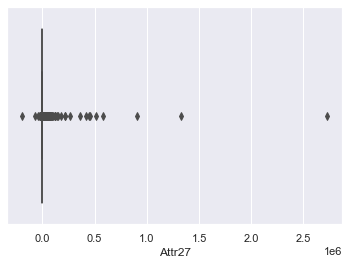

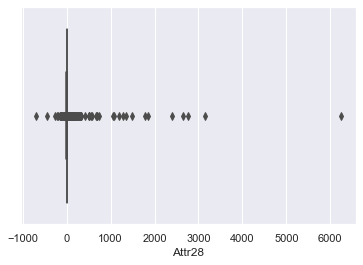

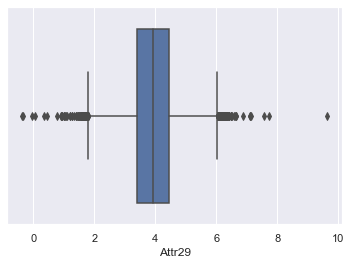

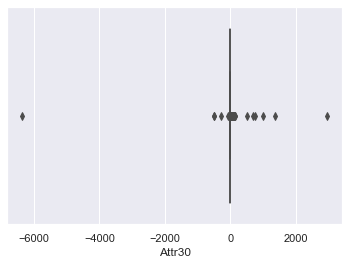

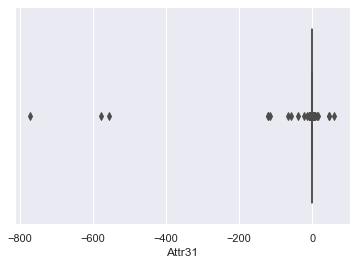

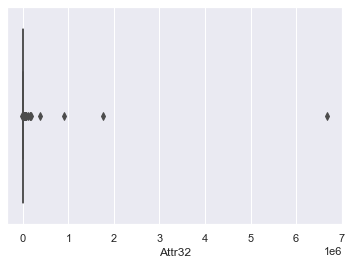

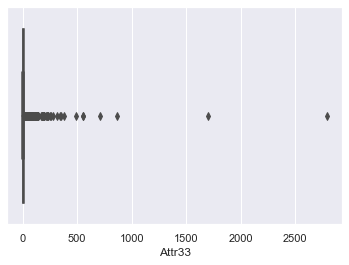

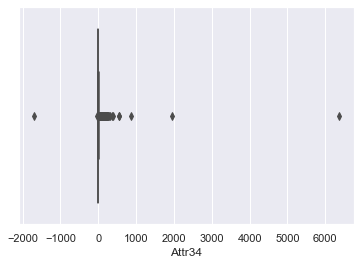

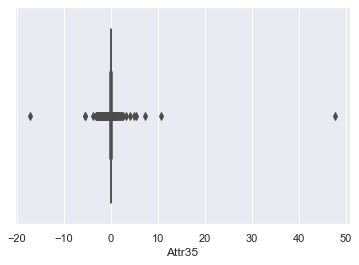

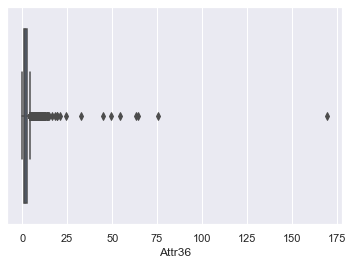

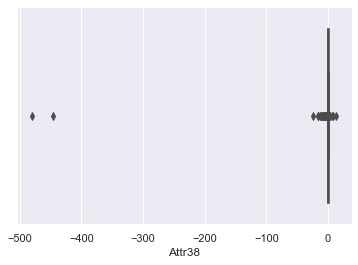

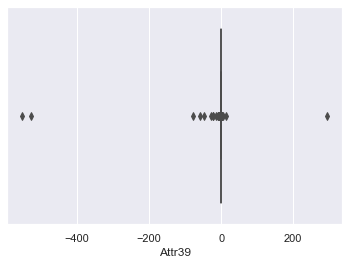

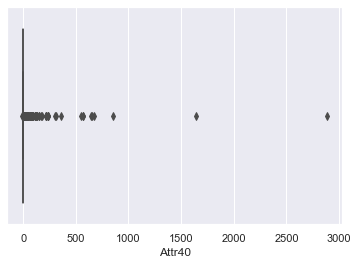

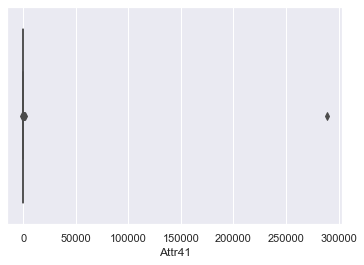

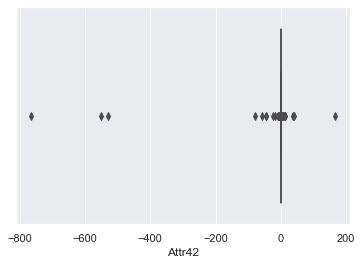

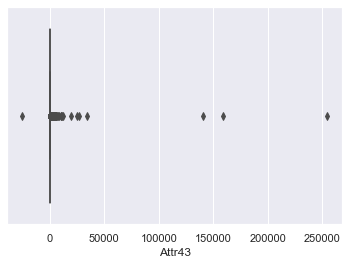

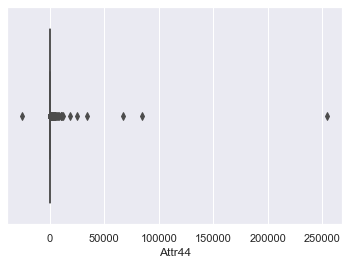

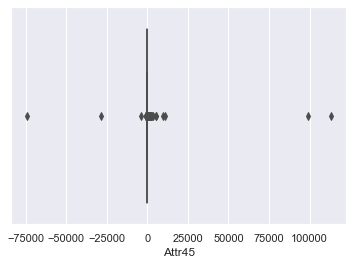

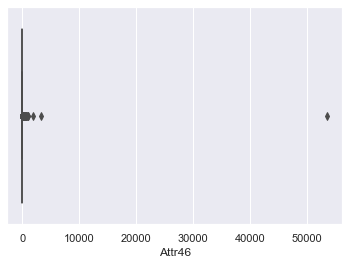

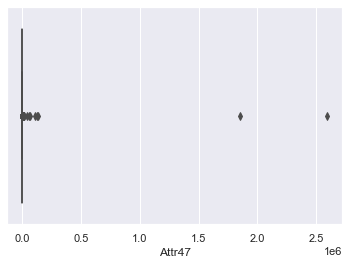

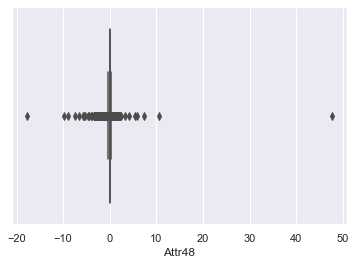

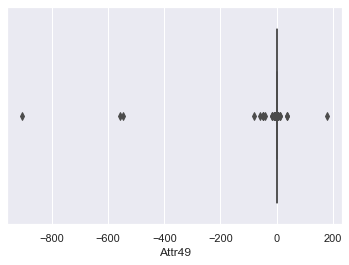

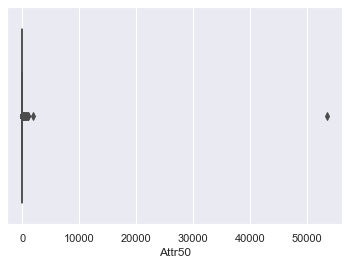

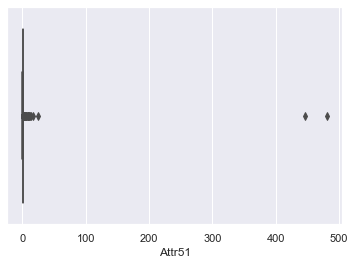

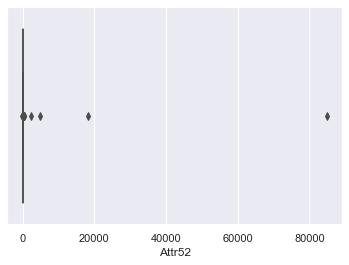

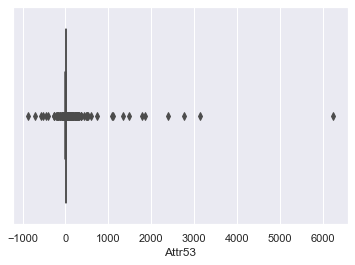

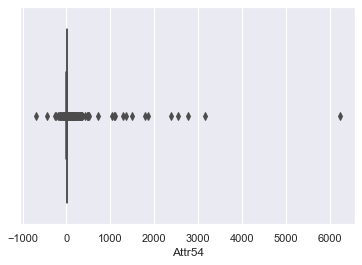

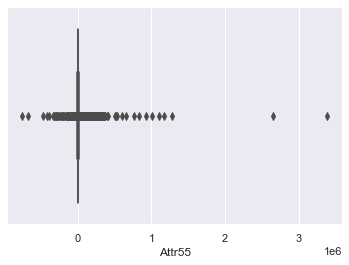

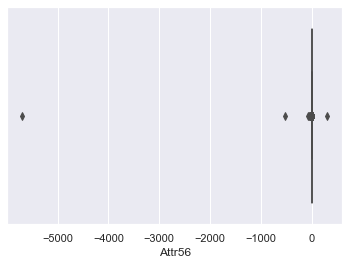

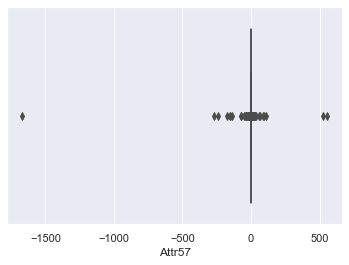

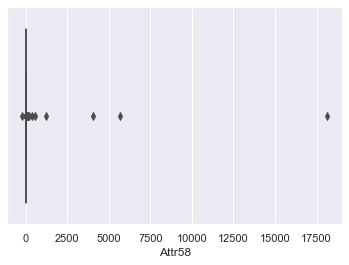

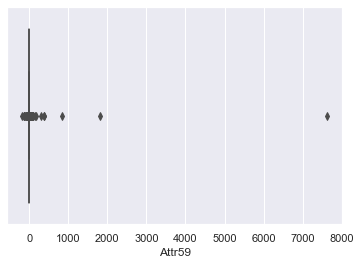

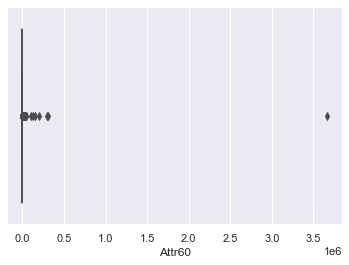

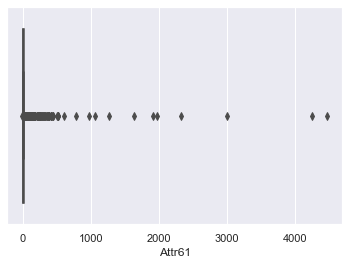

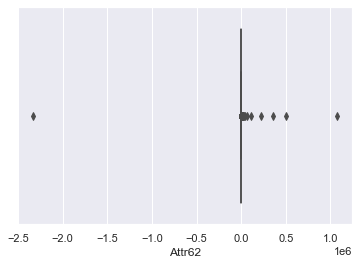

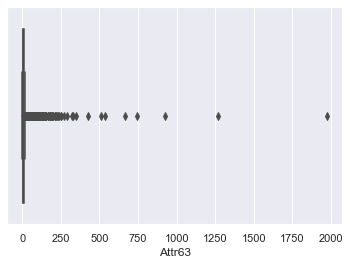

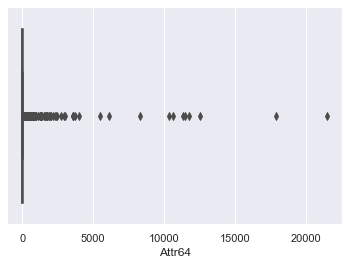

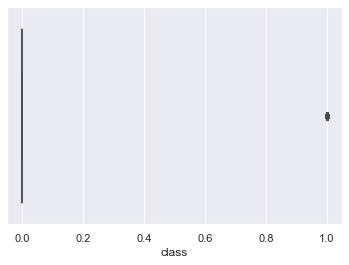

In [26]:
for column in data:
    sns.boxplot(x=data[column])
    plt.show()

In [27]:
def IQR_Method(column,df):
    # First quartile (Q1)
    Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')

    # Interquartile Range 
    IQR = Q3-Q1

    #Lower and Upper Bounds
    lower_Range = Q1 -(1.5 * IQR)
    upper_Range = Q3 + (1.5 * IQR)

    #Remove the respective rows
    df.drop(df[ (df[column] > upper_Range) | (df[column] < lower_Range) ].index , inplace=True)

In [28]:
data_IQR = data_med
for i in data_IQR.columns:
    IQR_Method(i,data_IQR)

In [30]:
data_IQR['Attr1'].count()

521

2. Isolation Forest Method 

In [69]:
def Isolation_Forest(df):
    model=IsolationForest(n_estimators=100, max_samples='auto', max_features=1.0)
    for i in df.columns:
        model.fit(df[[i]])
        df['anomaly']=model.predict(df[[i]])
        df.drop(df[df['anomaly'] ==-1].index , inplace=True)
        df.drop(columns='anomaly',inplace=True)

In [70]:
Isolation_Forest(data_imputed)

In [71]:
data_imputed['Attr1'].count()

2

In [79]:
def outlier_detection_IF(df):
    model = IsolationForest(n_estimators = 100, max_samples='auto', contamination=float(0.1))#, max_features=1.0)
    model.fit(df)
    df['scores']=model.decision_function(df)
    df['anomaly']=model.predict(df)
    anomaly=df.loc[df['anomaly']==-1]
    anomaly_index=list(anomaly.index)
    print("\f The total number of anomalities in data is ", len(anomaly))
    return anomaly

In [85]:
data_outlier = data_imputed.copy(deep=True)
data_outlier.drop(columns='class',inplace=True)
anomaly = outlier_detection_IF(data_outlier)

 The total number of anomalities in data is  1063


In [91]:
data_clean = data_imputed.drop(index = anomaly.index)
data_clean['Attr1'].count()

9353

In [92]:
data_clean.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,scores
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0,0.067245
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0,0.080557
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0,0.086646
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0,0.090214
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0,0.070488


<b> Feature Selection </b>

1. Correlation Method 
2. ANOVA F test Method 

ANOVA F Test Method 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
X = data_clean.iloc[:,:63]
y = data['class']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
plt.figure(figsize=(20,5)) 
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

<b> Data Imbalance </b>